# Recognizing dogs and cats

The purpose of this laboratory is to build a first end to end reflex-based AI model to teach computers to [**understand images**](https://www.ted.com/talks/fei_fei_li_how_we_re_teaching_computers_to_understand_pictures).

In particular, the objective of this lab is to write an AI application able to recognize cats and dogs on images. Your application will take an image as input and will be able to say wheter the image contains a dog or a cat. You will work with the data of the [**Dogs vs Cats**](https://www.kaggle.com/c/dogs-vs-cats) competition from Kaggle. This competition was launched in 2013 and the first place was obtained by [Pierre Sermanet](https://research.google.com/pubs/PierreSermanet.html), actually Research Scientist at Google Brain, by using the [Overfeat](http://cilvr.nyu.edu/doku.php?id=software:overfeat:start#overfeatobject_recognizer_feature_extractor) deep learning library he wrote during his PhD at New York University under the supervision of [Yann Le Cun](http://yann.lecun.com/), Director of AI Research at Facebook. He obtained $1.09%$ of classification errors. Try to do your best to approach this score!!!

Two approaches will be used to adress this problem :
1. A traditional pattern recognition model in which hand-crafted features are extracted from images and used to represent them and to train classifiers.
2. A modern representation learning approach in which deep convolutional neural networks (CNN) are used to learn the image representations.

 

##  Learning outcomes
+ Building an end to end supervised machine learning pipeline : input data (training set) preparation, training (model learning), validation sets, cross-validation, hyper-parameter tuning, evaluation on the testing dataset.
+ Getting familiar with deep learning for image classification : model building and training, transfer learning, fine-tuning.
+ Getting familiar with some well-known librairies:
    + Machine learning : Scikit-learn ([http://scikit-learn.org/stable/](http://scikit-learn.org/stable/))
    + Deep learning: Keras ([https://keras.io/](https://keras.io/))
    + Computer vision : Scikit-image ([http://scikit-image.org/](http://scikit-image.org/) or OpenCV ([http://opencv.org/](http://opencv.org/))
    
**The final objective of this laboratory is to be aware to the potential but also to the limitations of reflex-based AI approaches towards visual recognition tasks.**
    

## Part 0 : Requirements
A set of packages will be useful to handle the first part of this study case.

    pip install -r requirements.txt

In [1]:
!pip install -r requirements.txt

  Using cached numpy-1.20.1-cp38-cp38-macosx_10_9_x86_64.whl (16.0 MB)


ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.1 which is incompatible.
ERROR: tensorflow-cpu 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.1 which is incompatible.
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


## Part 1 : A small tutorial on image classification

In this section, we will briefly introduce the image classification problem which consists in assigning to an input image one label from a fixed set of labels and which is one of the big challenge of computer vision and artifial intelligence. In our case, we will only consider two labels $\{dog, cat\}$. This small tutorial also aims at familiarizing you with machine learning and computer vision librairies that we will used in this course :
+ Scikit-Learn : [http://scikit-learn.org/stable/](http://scikit-learn.org/stable/)
+ OpenCV : [http://opencv.org/](http://opencv.org/) or Scikit-image ([http://scikit-image.org/](http://scikit-image.org/)).

![ImageCat](images/Diapositive1.jpg)

While the task of image classification is very easy for a human, we have to face with several challenge to build our automatic recognition algorithm among whom:

+ Viewpoint variation.
+ Scale variation.
+ Illumination conditions variation.
+ Deformation.
+ Occlusion.
+ Backgroud clutter.
+ Intraclass variation.

![ImageCatwithvariations](./images/Diapositive2.jpg)

![ImageCatwithocclusion](./images/Diapositive3.jpg)

Source : Images from the CS231n course of Stanford (Convolutional Neural Networks for Visual Recognition)












### A simple image classification pipeline

To built our image classification algorithm, we will follow the principle of a machine learning approach for image classification which consists in :
1. Collecting and preparing a dataset of images and their corresponding labels.
2. Using a machine learning algorithm to train a classifier.
3. Evaluate the classifier on new images.


![ImageClassificationpipeline](images/testphase.png)

#### Having a look on the available data

First, you have to  download the dataset that will be used to train and test our model. Before downloading the data, create a subdirectory in your working folder called data. Then download [DataDogsCatsChallenge.zip](https://filesender.renater.fr/?s=download&token=cd3d55af-2563-47c4-af3c-28a4eba661e7) into that directory and unzip it. This dataset contains 25,000 labelled dog and cat photos available for training, and 12,500 in the test set that we have to try to label for the Kaggle competition.

As we have seen in the lecture note, the standard practice in machine learning is to split the available data into at least two different subsets :
+ The **training set** : to learn the model.
+ The **testing set** : to evaluate the learned model.

You have also seen that is the also standard to add a third set to the split to build a **validation set** that will be used to fine-tune the parameters of the model.

I you have a look on the DogsCatsChallenge directory, you will see that the preparation of the data have been done and that the test and train sets are in separate subdirectories in which data for each category (cats and dogs) is also into subdirectories. Nevertheless, there is no validation set and one of your first task will be to build it.

The archive also contains a directory named **sample**. Training and validating the entire dataset can take some time. Therefore, it is a good practice to run first your algorithm on a small sample of your training and validation data before to run it on the entire set of data.


##### Image representation

Your first task will be to built a representation of the data, i.e. a feature vector which values quantify the contents of the image. We will see latter that, using Deep Convolutional Neural Networks, we can learn an efficient representation directly using raw pixel intensities as inputs. Here, we will just represent the images by two alternative representations.
+ A first representation is built using the raw data by simply resizing an input image to a fixed size (here $32 \times 32$ pixels) and then by flattening the RBG pixel intensities into a single vectors of numbers.
+ A second representation is built from the color histogram that characterizes the color distribution of the image. For this representation a color conversion into the HSV color space could be useful.

**Complete the functions below to build such representations**

Some helping functions :
+ With Numpy:
    + [Array flattening](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.flatten.html)
    
+ With OpenCV:

     + [Geometric transformations on images](http://docs.opencv.org/trunk/da/d6e/tutorial_py_geometric_transformations.html) 
     + [Colorspace conversion](http://docs.opencv.org/trunk/df/d9d/tutorial_py_colorspaces.html) 
     + [Histogram in OpenCV](http://docs.opencv.org/trunk/de/db2/tutorial_py_table_of_contents_histograms.html)
    
+ With Scikit-image :
    + [Loading an image from a file](https://scikit-image.org/docs/stable/user_guide/data_types.html)
    + [Image transformations](https://scikit-image.org/docs/dev/user_guide/transforming_image_data.html)
    + [Colorspace conversion](https://scikit-image.org/docs/dev/user_guide/transforming_image_data.html#color-manipulation)
     
    

Le code ci-dessous charge les dépendances utiles pour la suite.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

## Part 3 : Using Convolutional Neural Networks

In this part, you are going to use convolutional neural networks (CNNs) and deep learning in order to build your image classifier. You will use the [Keras framework](https://keras.io/) which is a high-level neural networks API, written in Python and capable of running on top of [TensorFlow](https://www.tensorflow.org/), [CNTK](https://github.com/Microsoft/CNTK), or [Theano](http://www.deeplearning.net/software/theano/). It was developed with a focus on enabling fast experimentation and as a consequence it is a good choice for this course. Various other frameworks are available and can also be used such as [Caffe framework](http://caffe.berkeleyvision.org/), [Torch](http://torch.ch/) or [DeepLearning4j](https://deeplearning4j.org/) among others. Another important deep learning framework is [pytorch](https://pytorch.org/).


### Keras with sample data from the Dogs and cats recognition challenge

In this part, you will have to use Keras in order to
 + Build and train a small network from scratch
 + Use the bottleneck features of a pre-trained network
 + Fine-tune the top layers of a pre-trained network

The work will be done on a **sample dataset** (sampleDeep) of the initial Kaggle challenge that contains a training set composed of 1000 images of cats and 1000 images of dogs and a validation set, used to evaluate our models, that contains 400 additional samples from each class.

At the end, you could apply this approach on the whole dataset but it will imply to have other computing ressources than just your own computer.



#### Data preparation and loading

As for the previous classifiers, data preparation is also required when working with convolutional neural networks and deep learning models. You will use the [*ImageDataGenerator class*](https://keras.io/preprocessing/image/) that defines the configuration for image data preparation but also for data augmentation, a step often necessary for deep learning. In the code below, you will have to create and configure an `ImageDataGenerator` and to fit it on your data. In this example, we will use the sample dataset of the Dogs and Cats challenge. We consider that you have a training directory and a validation directory setup in this manner :

    train_dir/
        dog/
        cat/
    val_dir/
        dog/
        cat
 This is the case of the `sampleDeep` dataset.
 

In [3]:
# without augmentation, only rescaling

from keras.preprocessing.image import ImageDataGenerator

# definition of the number of samples propagated through the network at each step
batch_size = 16

# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/DogCatChallenge/sampleDeep/train'
validation_data_dir = 'data/DogCatChallenge/sampleDeep/valid'

# create and configure an ImageDataGenerator for the training data with only rescaling to 0..1
train_datagen =  ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,  # the target directory
        target_size=(img_width, img_height),  # all images will be resized to 150x150
        batch_size=batch_size) 

# create and configure an ImageDataGenerator for the validation data with only rescaling to 0..1
test_datagen =  ImageDataGenerator(rescale=1./255)

valid_generator = test_datagen.flow_from_directory(
        validation_data_dir,  # the target directory
        target_size=(img_width, img_height),  # all images will be resized to 150x150
        batch_size=batch_size) 



Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


Only few training examples are available in the `sampleDeep` dataset. In order to make the most of these training examples, a current approach is to **augment** them via a number of random transformations, so that our model would never see twice the exact same picture. This augmentation step helps prevent overfitting and helps the model generalize better.


In [4]:
# with augmentation 

from keras.preprocessing.image import ImageDataGenerator

# definition of the number of samples propagated through the network at each step
batch_size = 16

# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/DogCatChallenge/sampleDeep/train'
validation_data_dir = 'data/DogCatChallenge/sampleDeep/valid'

# Create and configure an ImageDataGenerator for the training data
# TO DO :  augmentation of the training data using rotation, horizontal and vertical shift, shearing tranformation, zooming 
train_datagen = ImageDataGenerator(
    rotation_range=120,
    width_shift_range=0.6,
    height_shift_range=0.5,
    brightness_range=[0.2,1.0],
    shear_range=50,
    zoom_range=[0.5,1.0],
    rescale=1./255
)

# TO DO : Create and configure an ImageDataGenerator for the validation data
# Only rescaling for validation data
valid_datagen = ImageDataGenerator(rescale=1./255)

# TO DO : generator that will read pictures found in the train dataset directory and that will indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        train_data_dir,  # the target directory
        target_size=(img_width, img_height),  # all images will be resized to 150x150
        batch_size=batch_size
)

# TO DO : Similar generator for validation data
valid_generator = test_datagen.flow_from_directory(
        validation_data_dir,  # the target directory
        target_size=(img_width, img_height),  # all images will be resized to 150x150
        batch_size=batch_size
)

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


## Build a model from scratch

Models can be build easily with the Keras API. Here we will use the Sequential model API :
+ [https://keras.io/getting-started/sequential-model-guide/](https://keras.io/getting-started/sequential-model-guide/)


Here, you will build a convolutional neural network which is ,by design, one of the best models available for most "perceptual" problems (such as image classification), even with very little data to learn from.

In the code below, you have to build a model composed of 3 convolution layers with a ReLU activation and followed by max-pooling layers.
In order to write the code, have a look on the [documentation on the different kinds of layers available in Keras](https://keras.io/layers/about-keras-layers/)




In [5]:
%reload_ext tensorboard
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


import tensorflow as tf
import datetime
import os

model = Sequential()

# First convolutional layer

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(4,4)))

# Second  convolutional layer

model.add(Conv2D(64, (5,5), activation='relu'))
# on tente sans pooling pour ne pas trop réduire la taille de l'image
 
# Third convolutional layer    

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))   # pour éviter l'overfitting

# Adding of two fully-connected layers 

model.add(Flatten())
model.add(Dense(512, activation='relu'))  # on aurait pu monter encore en termes de units
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.15))


# single unit and sigmoid activation, which is perfect for a binary classification. 

model.add(Dense(1))
model.add(Activation('sigmoid'))

# Use of the binary_crossentropy loss to train our model, of the rmsprop optimizer and the accuracy metrics
from keras.optimizers import Adam


model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


### Visualizing a model

It may be sometimes useful to visualize in a schematic way a model architecture. You can do it with different approaches on Keras :

+ using the `plot_model` built-in function : see [this small tutorial](https://www.machinecurve.com/index.php/2019/10/07/how-to-visualize-a-model-with-keras/) or the [official documentation](https://keras.io/api/utils/model_plotting_utils/).
+ using [TensorBoard](https://www.tensorflow.org/tensorboard) if you are using the tensorflow backend on Keras. You can also find some documentations on this small [tutorial](https://www.machinecurve.com/index.php/2019/12/03/visualize-keras-models-overview-of-visualization-methods-tools/#visualizing-model-architecture-tensorboard)

In [6]:
from keras.utils.vis_utils import plot_model
# TO DO
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 33, 33, 64)        51264     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0

In [27]:
!pip install pydot

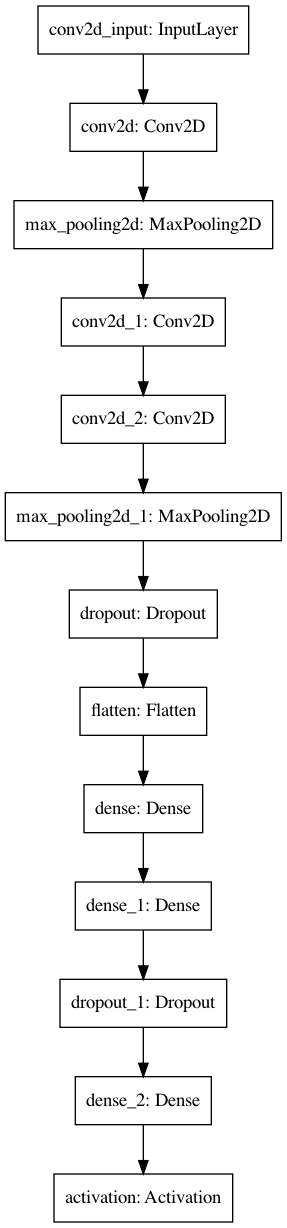

In [7]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='mymodel.png')

### Training a model

We can now use some defined generators to train your build model.

In [8]:
# augmentation configuration use for training:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# augmentation configuration use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

# fit the generator to your data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# model training
history = model.fit(
    train_generator,
    steps_per_epoch = 20,
    epochs = 50,   # étant donné qu'on a peu de données...
    verbose = 1,
    validation_data = validation_generator,callbacks=[tensorboard_callback]
)

# saving the learned model
model.save_weights('first_try.h5')


Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/50
20/20 [==============================] - 8s 372ms/step - loss: 0.6986 - accuracy: 0.4418 - val_loss: 0.6918 - val_accuracy: 0.5088
Epoch 2/50
20/20 [==============================] - 6s 323ms/step - loss: 0.6905 - accuracy: 0.5199 - val_loss: 0.7029 - val_accuracy: 0.5000
Epoch 3/50
20/20 [==============================] - 7s 330ms/step - loss: 0.6956 - accuracy: 0.5023 - val_loss: 0.6866 - val_accuracy: 0.5387
Epoch 4/50
20/20 [==============================] - 6s 316ms/step - loss: 0.6873 - accuracy: 0.5545 - val_loss: 0.6990 - val_accuracy: 0.5000
Epoch 5/50
20/20 [==============================] - 6s 320ms/step - loss: 0.6802 - accuracy: 0.5471 - val_loss: 0.7116 - val_accuracy: 0.5000
Epoch 6/50
20/20 [==============================] - 6s 325ms/step - loss: 0.7262 - accuracy: 0.4575 - val_loss: 0.6860 - val_accuracy: 0.5200
Epoch 7/50
20/20 [==============================] - 7s 336ms/step

In [9]:
%tensorboard --logdir logs

#### Carefully have a look on the results and on the diffferent metrics and their obtained values. What is your interpretation of the results ?

You can now apply this model to any new image. For instance, in the code below, you have to apply the model on different images of the test dataset. 

Prediction


array([[0.6756277]], dtype=float32)

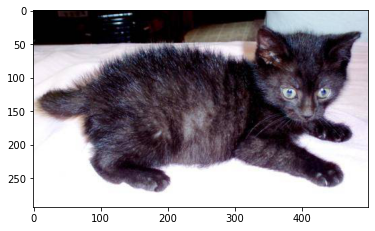

In [12]:
%matplotlib inline

from skimage import data, io
from matplotlib.pyplot import imshow
from keras.preprocessing import image
import numpy as np

img_path = 'data/DogCatChallenge/test1/10001.jpg'

ima=io.imread(img_path)
imshow(ima)

# image loading and transformation to keras
image = image.img_to_array(image.load_img(img_path, target_size=(img_width, img_height))) / 255
single_im = np.expand_dims(image, axis=0)

# prediction on the image
print("Prediction")

pred = model.predict(single_im)
pred


## Use a pretrained Convnet model

In practice, very few people train an entire Convolutional Network from scratch (with random initialization), because it is relatively rare to have a dataset of sufficient size. Instead, in image classification, it is common to use networks pre-trained on a large dataset (such as ImageNet)  and to use it either as an initialization of as a fixed feature extractor for the task of interest (**transfer learning**). Indeed, these networks have already learned features that are useful for most computer vision problems, and leveraging such features would allow us to reach a better accuracy than any method that would only rely on the available data.

Different strategies can be used in transfer learning scenarios :

1. The ConvNet, trained on a large image dataset such as Imagenet, is used as a fixed feature extractor. In this case, the pipeline consists in taking the pre-trained ConvNet, removing the last fully connected layer and that by treating the rest of the ConvNet architecture as a fixed feature extractor for the new dataset
2. Fine Tuning of the ConvNet. In this case,  the weights of a part of the pretrained network are fine-tuned by continuing the backpropagation. As it as been observed that the first features of a ConvNet contain more generic features (e.g. edge detectors or color blob detectors) that should be useful to many tasks and that later layers become progressively more specific to the details of the classes contained in the original dataset, only a higher portion of the network is fine-tuned.


### ConvNet as a fixed feature extractor   

In our case, the ImageNet dataset contains several "cat" classes (persian cat, siamese cat...) and many "dog" classes among its total of 1000 classes. As a consequence any model pre-trained on ImageNet will already have learned features that are relevant to our classification problem. 

In particular, we will use the VGG16 architecture which won the 2014 Imagenet competition, and is a very simple model to create and understand. The VGG Imagenet team created both a larger, slower, slightly more accurate model (VGG 19) and a smaller, faster model (VGG 16). We will be using VGG 16 since the much slower performance of VGG19 is generally not worth the very minor improvement in accuracy.

![VGG16](images/vgg16.png)

Source : [https://blog.heuritech.com/2016/02/29/a-brief-report-of-the-heuritech-deep-learning-meetup-5/](https://blog.heuritech.com/2016/02/29/a-brief-report-of-the-heuritech-deep-learning-meetup-5/)

In the code below, the strategy will consist in instantiating only the convolutional part of the model (using the *include_top* argument) (see the [Keras documentation on VGG16](https://keras.io/applications/#vgg16)) and in running this model on our own training and validation data once by recording the output in two numpy arrays. Then, you will train a small fully-connected model on top of the stored features.

Some references :
 + VGG models : [http://www.robots.ox.ac.uk/~vgg/research/very_deep/](http://www.robots.ox.ac.uk/~vgg/research/very_deep/)
 



In [16]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.applications.vgg16 import VGG16


# dimensions of our images.
img_width, img_height = 150, 150

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'data/DogCatChallenge/sampleDeep/train'
validation_data_dir = 'data/DogCatChallenge/sampleDeep/valid'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16


# Function that instanciates the convolutional part of the VGG16 pre-trained model on Imagenet and that runs it on our training and validation data

def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build and load the VGG16 network without the fully connected layers
    model = VGG16(weights='imagenet', include_top=False)

    # preparation of the training data
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    
    # Generation of the predictions for the input samples from the training data generator and return them as a numpy array that we can saved
    bottleneck_features_train = model.predict(generator)
    np.save(open('bottleneck_features_train.npy', 'wb'),
            bottleneck_features_train)

    # preparation of the validation data
    
    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        #batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    
    # Generation of the predictions for the input samples from the validation data generator and return them as a numpy array that we can saved
    bottleneck_features_validation = model.predict(generator)
    np.save(open('bottleneck_features_validation.npy', 'wb'),
            bottleneck_features_validation)
    
    
save_bottlebeck_features()

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [18]:
# Function that trains a small fully-connected model on top of the stored previous features
def train_top_model():
    train_data = np.load(open('bottleneck_features_train.npy','rb'))
    train_labels = np.array(
        [0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

    validation_data = np.load(open('bottleneck_features_validation.npy','rb'))
    validation_labels = np.array(
        [0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

    # Building of the small fully-connected model
    model = Sequential([
        Flatten(),
        Dense(256, activation='relu'), 
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    # Configuration of the learning process
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

    # Training of the model
    history = model.fit(
        train_data,
        train_labels,
        steps_per_epoch = 20, 
        epochs = epochs,   # dataset relativement petit
        batch_size = batch_size,
        verbose = 1,
        validation_data = (validation_data,validation_labels),callbacks=[tensorboard_callback]

    )
    
    model.save('bottleneck_fc_model')
    
train_top_model()

Epoch 1/50
20/20 [==============================] - 1s 39ms/step - loss: 2.1060 - accuracy: 0.5658 - val_loss: 0.4283 - val_accuracy: 0.8150
Epoch 2/50
20/20 [==============================] - 0s 25ms/step - loss: 0.5341 - accuracy: 0.7529 - val_loss: 0.4574 - val_accuracy: 0.7663
Epoch 3/50
20/20 [==============================] - 0s 25ms/step - loss: 0.5397 - accuracy: 0.6955 - val_loss: 0.5903 - val_accuracy: 0.7437
Epoch 4/50
20/20 [==============================] - 1s 27ms/step - loss: 0.5553 - accuracy: 0.7204 - val_loss: 0.2869 - val_accuracy: 0.8737
Epoch 5/50
20/20 [==============================] - 1s 26ms/step - loss: 0.4278 - accuracy: 0.7877 - val_loss: 0.3111 - val_accuracy: 0.8462
Epoch 6/50
20/20 [==============================] - 0s 25ms/step - loss: 0.3759 - accuracy: 0.8783 - val_loss: 0.2728 - val_accuracy: 0.8875
Epoch 7/50
20/20 [==============================] - 0s 25ms/step - loss: 0.3194 - accuracy: 0.8681 - val_loss: 0.2972 - val_accuracy: 0.8875
Epoch 8/50
20

In [19]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6008 (pid 26927), started 0:12:23 ago. (Use '!kill 26927' to kill it.)

In [20]:
# Function that trains a small fully-connected model on top of the stored previous features
def train_top_model():
    train_data = np.load(open('bottleneck_features_train.npy','rb'))
    train_labels = np.array(
        [0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

    validation_data = np.load(open('bottleneck_features_validation.npy','rb'))
    validation_labels = np.array(
        [0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

    # Building of the small fully-connected model
    model = Sequential([
        Flatten(),
        Dense(256, activation='relu'), 
        # on peut carrément rajouter du dropout vu l'overfitting
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    # Configuration of the learning process
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])
    # on peut également rajouter de la régularisation dans la fonction de coût pour diminuer overfitting

    # Training of the model
    history = model.fit(
        train_data,
        train_labels, 
        epochs = epochs,   # dataset relativement petit
        batch_size = batch_size,
        verbose = 1,
        validation_data = (validation_data,validation_labels),
        callbacks=[tensorboard_callback]
    )
    
    model.save('bottleneck_fc_model2')
    
train_top_model()

Epoch 1/50
125/125 [==============================] - 3s 24ms/step - loss: 0.8366 - accuracy: 0.6548 - val_loss: 0.5725 - val_accuracy: 0.7362
Epoch 2/50
125/125 [==============================] - 3s 22ms/step - loss: 0.2942 - accuracy: 0.8918 - val_loss: 0.5930 - val_accuracy: 0.7462
Epoch 3/50
125/125 [==============================] - 3s 21ms/step - loss: 0.2444 - accuracy: 0.9015 - val_loss: 0.2615 - val_accuracy: 0.8900
Epoch 4/50
125/125 [==============================] - 3s 22ms/step - loss: 0.1674 - accuracy: 0.9281 - val_loss: 0.4256 - val_accuracy: 0.8550
Epoch 5/50
125/125 [==============================] - 3s 22ms/step - loss: 0.1133 - accuracy: 0.9558 - val_loss: 0.3091 - val_accuracy: 0.8963
Epoch 6/50
125/125 [==============================] - 3s 22ms/step - loss: 0.0905 - accuracy: 0.9625 - val_loss: 0.3220 - val_accuracy: 0.8788
Epoch 7/50
125/125 [==============================] - 3s 21ms/step - loss: 0.0573 - accuracy: 0.9799 - val_loss: 0.5190 - val_accuracy: 0.8737

In [21]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6008 (pid 26927), started 0:16:16 ago. (Use '!kill 26927' to kill it.)

Les avantages : apprentissage ultra rapide ; le problème : on overfit sur le training

#### Carefully have a look on the results and on the diffferent metrics and their obtained values. What is your interpretation of the results ?
Try to apply this model of some unknown images, even images without dogs ar cats.

## Fine-tuning the top layers of a a pre-trained network

We will now try to "fine-tune" the last convolutional block of the VGG16 model. It consist in starting from a trained network (the VGG16 network), then re-training it on a new dataset using very small weight updates. In our case, this can be done in 3 steps:
+ Instantiate the convolutional base of VGG16 and load its weights.
+ Add our previously defined fully-connected model on top, and load its weights.
+ Freeze the layers of the VGG16 model up to the last convolutional block


In [22]:
from keras import applications
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
import keras

# path to the model weights files.
weights_path = '../keras/examples/vgg16_weights.h5'
top_model_weights_path = 'bottleneck_fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150
backend.image_data_format()

train_data_dir = 'data/DogCatChallenge/sampleDeep/train'
validation_data_dir = 'data/DogCatChallenge/sampleDeep/valid'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

# creation of the base VGG pre-trained model
model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_width,img_height,3))
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
"""
top_model = Sequential()
top_model.add(Flatten())
top_model.add(Dense(256, activation='relu'))
top_model.add(Dense(128, activation='relu'))
top_model.add(Dense(1, activation='sigmoid'))
"""
# on fait autrement


# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model = keras.models.load_model('bottleneck_fc_model')
#top_model.load_weights(top_model_weights_path)


# creation of a real model from vgg
new_model = Sequential()
for l in model.layers:
    new_model.add(l)


# concatenation of the base model with the top model
new_model.add(top_model)


# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
#NON
#for layer in new_model.layers[:25]:
#    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
new_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# fine-tune the model

history = new_model.fit(
    train_generator,
    steps_per_epoch = 20,  
    epochs = 5,
    verbose = 1,
    batch_size = batch_size,
    validation_data = validation_generator,
    callbacks=[tensorboard_callback]
    
)



Model loaded.
Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/5
20/20 [==============================] - 62s 3s/step - loss: 0.3823 - accuracy: 0.8812 - val_loss: 0.3806 - val_accuracy: 0.8662
Epoch 2/5
20/20 [==============================] - 61s 3s/step - loss: 0.3527 - accuracy: 0.8664 - val_loss: 0.2559 - val_accuracy: 0.9125
Epoch 3/5
20/20 [==============================] - 62s 3s/step - loss: 0.3065 - accuracy: 0.8474 - val_loss: 0.2587 - val_accuracy: 0.9013
Epoch 4/5
20/20 [==============================] - 62s 3s/step - loss: 0.2094 - accuracy: 0.9162 - val_loss: 0.2911 - val_accuracy: 0.9075
Epoch 5/5
20/20 [==============================] - 66s 3s/step - loss: 0.1353 - accuracy: 0.9415 - val_loss: 0.3030 - val_accuracy: 0.9200


Tout est alors beaucoup plus long (vu que même un forward pass prend longtemps... même la validation est longue)

In [24]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6008 (pid 26927), started 0:23:00 ago. (Use '!kill 26927' to kill it.)

#### Carefully have a look on the results and on the diffferent metrics and their obtained values. What is your interpretation of the results ?
Try to apply this model of some unknown images, even images without dogs ar cats.

In [3]:
import io

ima=io.imread(img_path)
imshow(ima)

pred = new_model.predict(single_im)
pred

AttributeError: module 'io' has no attribute 'imread'

#### Summary of Part 3

    
+ <span style="background-color:lightgreen">Introduction to representation learning </span>.
+ <span style="background-color:lightgreen"> Introduction to deep learning and CNN.</span> 
+ <span style="background-color:lightgreen"> Practice on Keras </span>
+ <span style="background-color:lightgreen"> Introduction to transfer learning and fine tuning </span>

<span style="background-color:lightblue"> You have finished the part 2 ! Complete the dashboard on the global MsTeams team.</span>

## Opening the black box [Optional]

Deep neural network models are often considered as  black-boxes and their performances come at the price of loss of interpretability. Indeed, they fail to provide explanations on their predictions. In high-risk domains, e.g., health care, or in a context of production, it is crucial to build trust in a model and being able to understand its behavior. This sub-fied of artificial intelligence is known as XAI (eXplainable Artificial Intelligence) (see for instance this [tutorial](https://sites.google.com/view/www20-explainable-ai-tutorial) or the DARPA initiative [here](https://www.darpa.mil/attachments/XAIProgramUpdate.pdf)).

In particular different approaches are now well established as tools to explain a model or a model decision. You can test them on your different classification models.



#### Activation Maximization

See this [tutorial](https://www.machinecurve.com/index.php/2019/11/18/visualizing-keras-model-inputs-with-activation-maximization/) to test it on your models.


In [ ]:
# TO DO
# Activation maximization on your models.




#### Saliency maps

See this [tutorial](https://www.machinecurve.com/index.php/2019/11/25/visualizing-keras-cnn-attention-saliency-maps/) to test it.

In [ ]:
# TO DO
# Saliency maps on your models.

If you are interested to go deeper, a very nice tutorial is available [here](https://interpretablevision.github.io/)

# Part 4 : Your turn on a more challenging case

Do the same job but this time on the PET Dataset : [http://www.robots.ox.ac.uk/~vgg/data/pets/](http://www.robots.ox.ac.uk/~vgg/data/pets/) which contains 37 category of pets with roughly 200 images for each class.

# Sources and references

+ This study case is inpired from the Lesson 1 of the fast.ai's online course, Practical Deep Learning For Coders : [http://course.fast.ai/](http://course.fast.ai/)
+ Others sources :
    + Stanford CS231n course on Convolutional Neural Networks for Visual Recognition : [http://cs231n.stanford.edu/](http://cs231n.stanford.edu/)
    + Keras blog post on building image classification models [here](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)